## Importamos librerías

In [4]:
from sympy import *             # Librería para trabajo simbólico
import numpy as np              # Librería para cálculo numérico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from scipy import integrate     # Librería de integración

### Ejercicio 

Un gas con masa 1 kg y a una presión de  $P_1=1$ bar se encuentra contenido  en un dispositivo cilindro-pistón con un volumen inicial $V_1=1$ m$^3$. Considerando un proceso politrópico:

$$PV^n=C$$

a) Determinar $P_2$ si $n=1.1$ y $V_2=2$ m$^3$.

b) Determinar $P_2$ si se considera un proceso isotermo y $V_2=2$ m$^3$.

c) Determinar $P_2$ si se considera un proceso adiabatico y $V_2=2$ m$^3$.

d) Determinar $P_2$ si se considera un proceso isóbaro y $V_2=2$ m$^3$.

In [5]:
P1=1.0 #bar
V1= 1.0  #m3

# a)
n=1.1
V2=2.0
P2=(P1*V1**n)/(V2**n)
print("a) La presión es es:", P2, "bar")

# b)
n=1.0
V2=2.0
P2=(P1*V1**n)/(V2**n)
print("b) La presión es es:", P2, "bar")

# c)
n=1.4
V2=2.0
P2=(P1*V1**n)/(V2**n)
print("c) La presión es es:", P2, "bar")

# d)
n=0
V2=2.0
P2=(P1*V1**n)/(V2**n)
print("d) La presión es es:", P2, "bar")

a) La presión es es: 0.4665164957684037 bar
b) La presión es es: 0.5 bar
c) La presión es es: 0.37892914162759955 bar
d) La presión es es: 1.0 bar


### Problema 5

Un gas en un dispositivo cilindro-pistón sufre un proceso de expansión para el que la relación entre la presión y el volumen viene dada por:

$$PV^n=C$$

Si $P_1=3$ bar, $V_1=0.1$ m$^3$ y $V_2=0.2$ m$^3$. Determínese el trabajo, en kJ, para el proceso, si:

a) $n=1.5$

b) $n=1.0$

c) $n=0$

### Resolución:

Incluye definción de funciones, representación gráfica y calculo de la integral

La función P(V) del apartado a) es: 9486.83298050514*V**(-1.5) y el trabajo en J es:
(17573.593128807148, 1.951060771699614e-10)
La función P(V) del apartado b) es: 30000.0*V**(-1.0) y el trabajo en J es:
(20794.415416798358, 2.308643877934986e-10)
La función P(V) del apartado c) es: 300000.000000000 y el trabajo en J es:
(30000.0, 3.3306690738754696e-10)
El trabajo en J es: 17573.593128807144


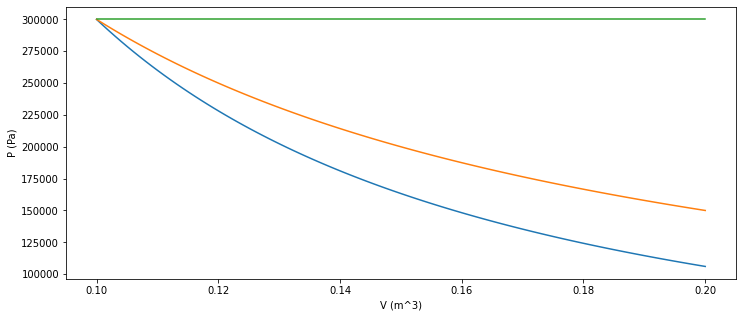

In [6]:
P1=3.0*100000 #Presion en Pa
V1=0.1
V2=0.2

V=symbols('V')

def Pa(V):
    n=1.5
    C=P1*V1**n
    return C/V**n

def Pb(V):
    n=1.0
    C=P1*V1**n
    return C/V**n    

def Pc(V):
    n=0
    C=P1*V1**n
    return C/V**n  

npt=100
V12 = np.linspace(V1, V2, npt) # la instrucción np.linspace(V1, V2, npt) genera un array de "npt" valores entre V1 y V2
#print("Los valores de V entre V1 y V2 son")
#print(V12)

P12a = Pa(V12) #Si evaluamos la función Pa pasándole el array entero V12, nos devuelve otro array P12a de presiones.
P12b = Pb(V12)
P12c = Pc(V12)

fig, ax1 = plt.subplots(figsize=(12, 5)) #con esta intrucción creamos una figura "fig", con ejes llamados "ax1", de tamaño 12x5
ax1.plot(V12,P12a) #dibuja la función P12a 
ax1.plot(V12,P12b)
ax1.plot(V12,P12c)
ax1.set_xlabel("V (m^3)") #etiqueta del eje x
ax1.set_ylabel("P (Pa)")  #etiqueta del eje y


print("La función P(V) del apartado a) es:", Pa(V), "y el trabajo en J es:")
print(integrate.quad(Pa, V1, V2)) #integral definida de Pa·dV  entre V1 y V2
print("La función P(V) del apartado b) es:", Pb(V), "y el trabajo en J es:")
print(integrate.quad(Pb, V1, V2))
print("La función P(V) del apartado c) es:", Pc(V), "y el trabajo en J es:")
print(integrate.quad(Pc, V1, V2))

print("El trabajo en J es:", (Pa(V2)*V2-P1*V1)/(1-1.5))


Vaux=V12
Paux=P12a
Wexact=integrate.quad(Pa, V1, V2)

### Resolución numérica (Opcional)

Aqui vamos a resolver el apartado a) "sin hacer integrales". Para ello se utilizará lo que se denomina "integración numérica", que se basa en trocear el area bajo la curva utilizando trapecios y sumar el area de cada uno de esos trozos.

La integral aproximada es:
17910.537496798563  J

Se han usado 3 trapecios y el error es:
336.94436799141477  J



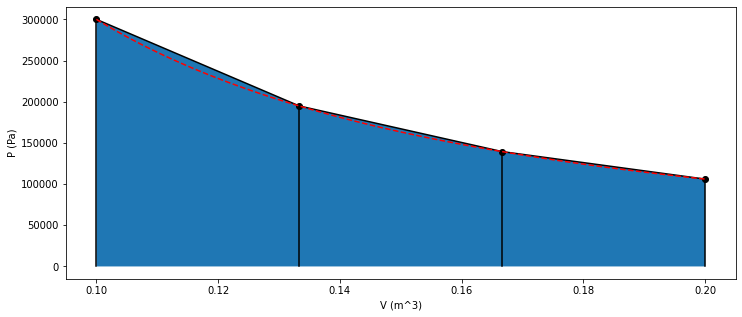

In [7]:
npt=4   #numero de puntos escogidos. Modificar para ver lo que ocurre...
V12 = np.linspace(V1, V2, npt)

P12a = Pa(V12)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(V12,P12a,'-ok')
ax1.fill_between(V12,np.zeros(npt),P12a)

sum=0.0
for ii in range(len(V12)): #bucle entre 0 y len(V12)-1, donde len(V12) es la longitud del array V12 (es decir, npt)
  ax1.plot([V12[ii],V12[ii]],[0,P12a[ii]],'-k')
  if ii<(len(V12)-1):
    sum+=0.5*(P12a[ii]+P12a[ii+1])*(V12[ii+1]-V12[ii]) #Regla del trapecio de integración numérica: se suman las areas de los trapecios

ax1.plot(Vaux,Paux,'--r') #esta es la curva exacta
ax1.set_xlabel("V (m^3)") 
ax1.set_ylabel("P (Pa)")  


print("La integral aproximada es:")
print(sum, " J\n")
print("Se han usado", npt-1, "trapecios y el error es:")
print(sum-Wexact[0], " J\n")



In [8]:
V1= 0.09  #m3
V2= 0.03  #m3

def Pres(V):
    return (-14*V+2.44)*1.e5

P1=Pres(V1)
P2=Pres(V2)

print(P1,P2)

print(integrate.quad(Pres, V1, V2))

print(1.18*(0.09-0.03)+(2.02-1.18)*0.5*(0.09-0.03))

118000.0 202000.0
(-9600.0, 1.0658141036401503e-10)
0.09599999999999999
